
# PORT-CITY SIMULATION DATA - EXPERIMENTS POISSON


## Import Dependencies & Pickle Files





In [1]:
 import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib.util
import seaborn as sns

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install -e /content/drive/MyDrive/TESE/src/quanttree/

Obtaining file:///content/drive/MyDrive/TESE/src/quanttree
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for quanttree (pyproject.toml) ... done
  Created wheel for quanttree: filename=quanttree-0.0.4-0.editable-py3-none-any.whl size=108224 sha256=4d225ecd28c10d14fa035889e75ed70b11f83513a89e6658681448f4264c7e8f
  Stored in directory: /tmp/pip-ephem-wheel-cache-0z5oboar/wheels/99/ec/85/1673340f6631e76e5fa250045531248d77a9fed5a40b47df7c
Successfully built quanttree
  Attempting uninstall: quanttree
    Found existing installation: quanttree 0.0.4
    Uninstalling quanttree-0.0.4:
      Successfully uninstalled quanttree-0.0.4


In [4]:
import sys
sys.path.append('/content/drive/MyDrive/TESE/src/quanttree/')

In [5]:
from quanttree import QT_EWMA, QuantTree
from quanttree.baselines import OnlineQuantTree, OnlineSPLL
from quanttree import utils

In [6]:
# Path to your script
module_path = '/content/drive/MyDrive/TESE/src/febagni_scripts.py'

# Load the module
spec = importlib.util.spec_from_file_location("febagni_scripts", module_path)
febagni_scripts = importlib.util.module_from_spec(spec)
spec.loader.exec_module(febagni_scripts)


In [7]:
def import_pickle(path):
  if os.path.exists(path):
    with open(path, 'rb') as f:
      print("Pickle file imported from: ", path)
      return pickle.load(f)
  else:
    print("File not found.")

In [8]:
def plot_distribution(scenario_0, scenario_1):
  num_variables = len(febagni_scripts.variable_names)

  fig, axes = plt.subplots(num_variables, 1, figsize=(20, 5 * num_variables)) # Changed to num_variables x 1 subplot grid

  for v in range(num_variables):
      # Ensure data is 1D
      data_s0_temp = scenario_0[v, :]
      data_s1_temp = scenario_1[v, :]

      sns.kdeplot(data=data_s0_temp, ax=axes[v], label='Baseline', color='blue') # Indexing with v
      sns.kdeplot(data=data_s1_temp, ax=axes[v], label='After Policy', color='red') # Indexing with v

      axes[v].set_title(f"{febagni_scripts.variable_names[v]}", fontsize=20) # Indexing with v
      axes[v].legend(fontsize=20)

  plt.tight_layout()
  plt.show()

In [9]:
def plot_distribution_francia(scenario_0, scenario_1):
  num_variables = 3

  fig, axes = plt.subplots(num_variables, 1, figsize=(20, 5 * num_variables)) # Changed to num_variables x 1 subplot grid

  for v in range(num_variables):
      # Ensure data is 1D
      data_s0_temp = scenario_0[v, :]
      data_s1_temp = scenario_1[v, :]

      sns.kdeplot(data=data_s0_temp, ax=axes[v], label='Baseline', color='blue') # Indexing with v
      sns.kdeplot(data=data_s1_temp, ax=axes[v], label='After Policy', color='red') # Indexing with v

      axes[v].set_title(f"{febagni_scripts.variable_names_francia[v]}", fontsize=20) # Indexing with v
      axes[v].legend(fontsize=20)

  plt.tight_layout()
  plt.show()

In [10]:
def plot_histograms(scenario_0, scenario_1):
    num_variables = len(febagni_scripts.variable_names)

    fig, axes = plt.subplots(num_variables, 1, figsize=(20, 5 * num_variables))

    for v in range(num_variables):
        data_s0_temp = scenario_0[v, :]
        data_s1_temp = scenario_1[v, :]

        #if (v==4) or (v==5):
        #  data_s0_temp = scenario_0[v, :] + np.random.normal(0, 0.5, size=scenario_0[v, :].shape)
        #  data_s1_temp = scenario_1[v, :] + np.random.normal(0, 0.5, size=scenario_1[v, :].shape)

        # Compute number of bins as the square root of unique values
        unique_values = np.unique(np.concatenate([data_s0_temp, data_s1_temp]))
        num_bins = max(1, int(np.sqrt(len(unique_values))))  # Ensure at least 1 bin

        axes[v].hist(data_s0_temp, bins=num_bins, alpha=0.5, label='Baseline',
                     color='blue', histtype='step', linewidth=4)
        axes[v].hist(data_s1_temp, bins=num_bins, alpha=0.5, label='After Policy',
                     color='red', histtype='step', linewidth=4)

        axes[v].set_title(f"{febagni_scripts.variable_names[v]}", fontsize=20)
        axes[v].set_xlabel("Value", fontsize=16)
        axes[v].set_ylabel("Frequency", fontsize=16)
        axes[v].tick_params(axis='both', labelsize=14)
        axes[v].legend(fontsize=20)

    plt.tight_layout()
    plt.show()


In [11]:
def plot_histograms_francia(scenario_0, scenario_1):
    num_variables = len(febagni_scripts.variable_names_francia)

    fig, axes = plt.subplots(num_variables, 1, figsize=(20, 5 * num_variables))

    for v in range(num_variables):
        data_s0_temp = scenario_0[v, :]
        data_s1_temp = scenario_1[v, :]

        # Compute number of bins as the square root of unique values
        unique_values = np.unique(np.concatenate([data_s0_temp, data_s1_temp]))
        num_bins = max(1, int(np.sqrt(len(unique_values))))  # Ensure at least 1 bin

        axes[v].hist(data_s0_temp, bins=num_bins, alpha=0.5, label='Baseline',
                     color='blue', histtype='step', linewidth=4)
        axes[v].hist(data_s1_temp, bins=num_bins, alpha=0.5, label='After Policy',
                     color='red', histtype='step', linewidth=4)

        axes[v].set_title(f"{febagni_scripts.variable_names[v]}", fontsize=20)
        axes[v].set_xlabel("Value", fontsize=16)
        axes[v].set_ylabel("Frequency", fontsize=16)
        axes[v].tick_params(axis='both', labelsize=14)
        axes[v].legend(fontsize=20)

    plt.tight_layout()
    plt.show()

In [12]:
def add_gaussian_noise_selected(data, variables_to_modify, mean=0, std=0.001):
    """Adds Gaussian noise to selected variables in the dataset.

    Parameters:
    - data: NumPy array (shape: variables × samples)
    - variables_to_modify: List of variable indices to modify
    - mean: Mean of the Gaussian noise (default=0)
    - std: Standard deviation of the Gaussian noise (default=1)

    Returns:
    - Modified data with noise added to specified variables
    """
    noisy_data = data.copy()  # Copy to avoid modifying original data

    for v in variables_to_modify:
        noise = np.random.normal(loc=mean, scale=std, size=data[v, :].shape)
        noisy_data[v, :] += noise

    return noisy_data

In [13]:
def count_unique_values(scenario_0, scenario_1, variable_names):
    num_variables = len(variable_names)

    for v in range(num_variables):
        unique_s0_count = len(np.unique(scenario_0[v, :]))
        unique_s1_count = len(np.unique(scenario_1[v, :]))

        print(f"Variable: {variable_names[v]}")
        print(f"  Unique count in Scenario 0: {unique_s0_count}")
        print(f"  Unique count in Scenario 1: {unique_s1_count}")
        print("-" * 50)

In [14]:
path_directory = '/content/drive/MyDrive/TESE/data/preprocessed/eann/'

for i in range(1, 13):
  path_s0_weekend = path_directory + "data_scenario2_poisson_weekend_base/data_" + str(i) + ".pkl"
  path_s0_weekday = path_directory + "data_scenario2_poisson_feriale_base/data_" + str(i) + ".pkl"
  path_s1_weekend = path_directory + "data_scenario2_poisson_weekend_bigchange/data_" + str(i) + ".pkl"
  path_s1_weekday = path_directory + "data_scenario2_poisson_feriale_bigchange/data_" + str(i) + ".pkl"

  if i == 1:
    s0_weekend = import_pickle(path_s0_weekend)
    s0_weekday = import_pickle(path_s0_weekday)
    s1_weekend = import_pickle(path_s1_weekend)
    s1_weekday = import_pickle(path_s1_weekday)
  else:
    s0_weekend = np.concatenate((s0_weekend, import_pickle(path_s0_weekend)), axis=1)
    s0_weekday = np.concatenate((s0_weekday, import_pickle(path_s0_weekday)), axis=1)
    s1_weekend = np.concatenate((s1_weekend, import_pickle(path_s1_weekend)), axis=1)
    s1_weekday = np.concatenate((s1_weekday, import_pickle(path_s1_weekday)), axis=1)

Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/eann/data_scenario2_poisson_weekend_base/data_1.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/eann/data_scenario2_poisson_feriale_base/data_1.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/eann/data_scenario2_poisson_weekend_bigchange/data_1.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/eann/data_scenario2_poisson_feriale_bigchange/data_1.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/eann/data_scenario2_poisson_weekend_base/data_2.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/eann/data_scenario2_poisson_feriale_base/data_2.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/eann/data_scenario2_poisson_weekend_bigchange/data_2.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/eann/data_scenario2_poisson_f

In [15]:
scenario_0 = febagni_scripts.create_multimodal_dataset(s0_weekday, s0_weekend, ratio=0.7)
scenario_0.shape

(21, 12000)

In [16]:
scenario_1 = febagni_scripts.create_multimodal_dataset(s1_weekday, s1_weekend, ratio=0.7)
scenario_1.shape

(21, 12000)

In [17]:
variables_to_modify = [4, 5, 10, 11, 16, 17, 20]
scenario_0 = add_gaussian_noise_selected(scenario_0, variables_to_modify)
scenario_1 = add_gaussian_noise_selected(scenario_1, variables_to_modify)

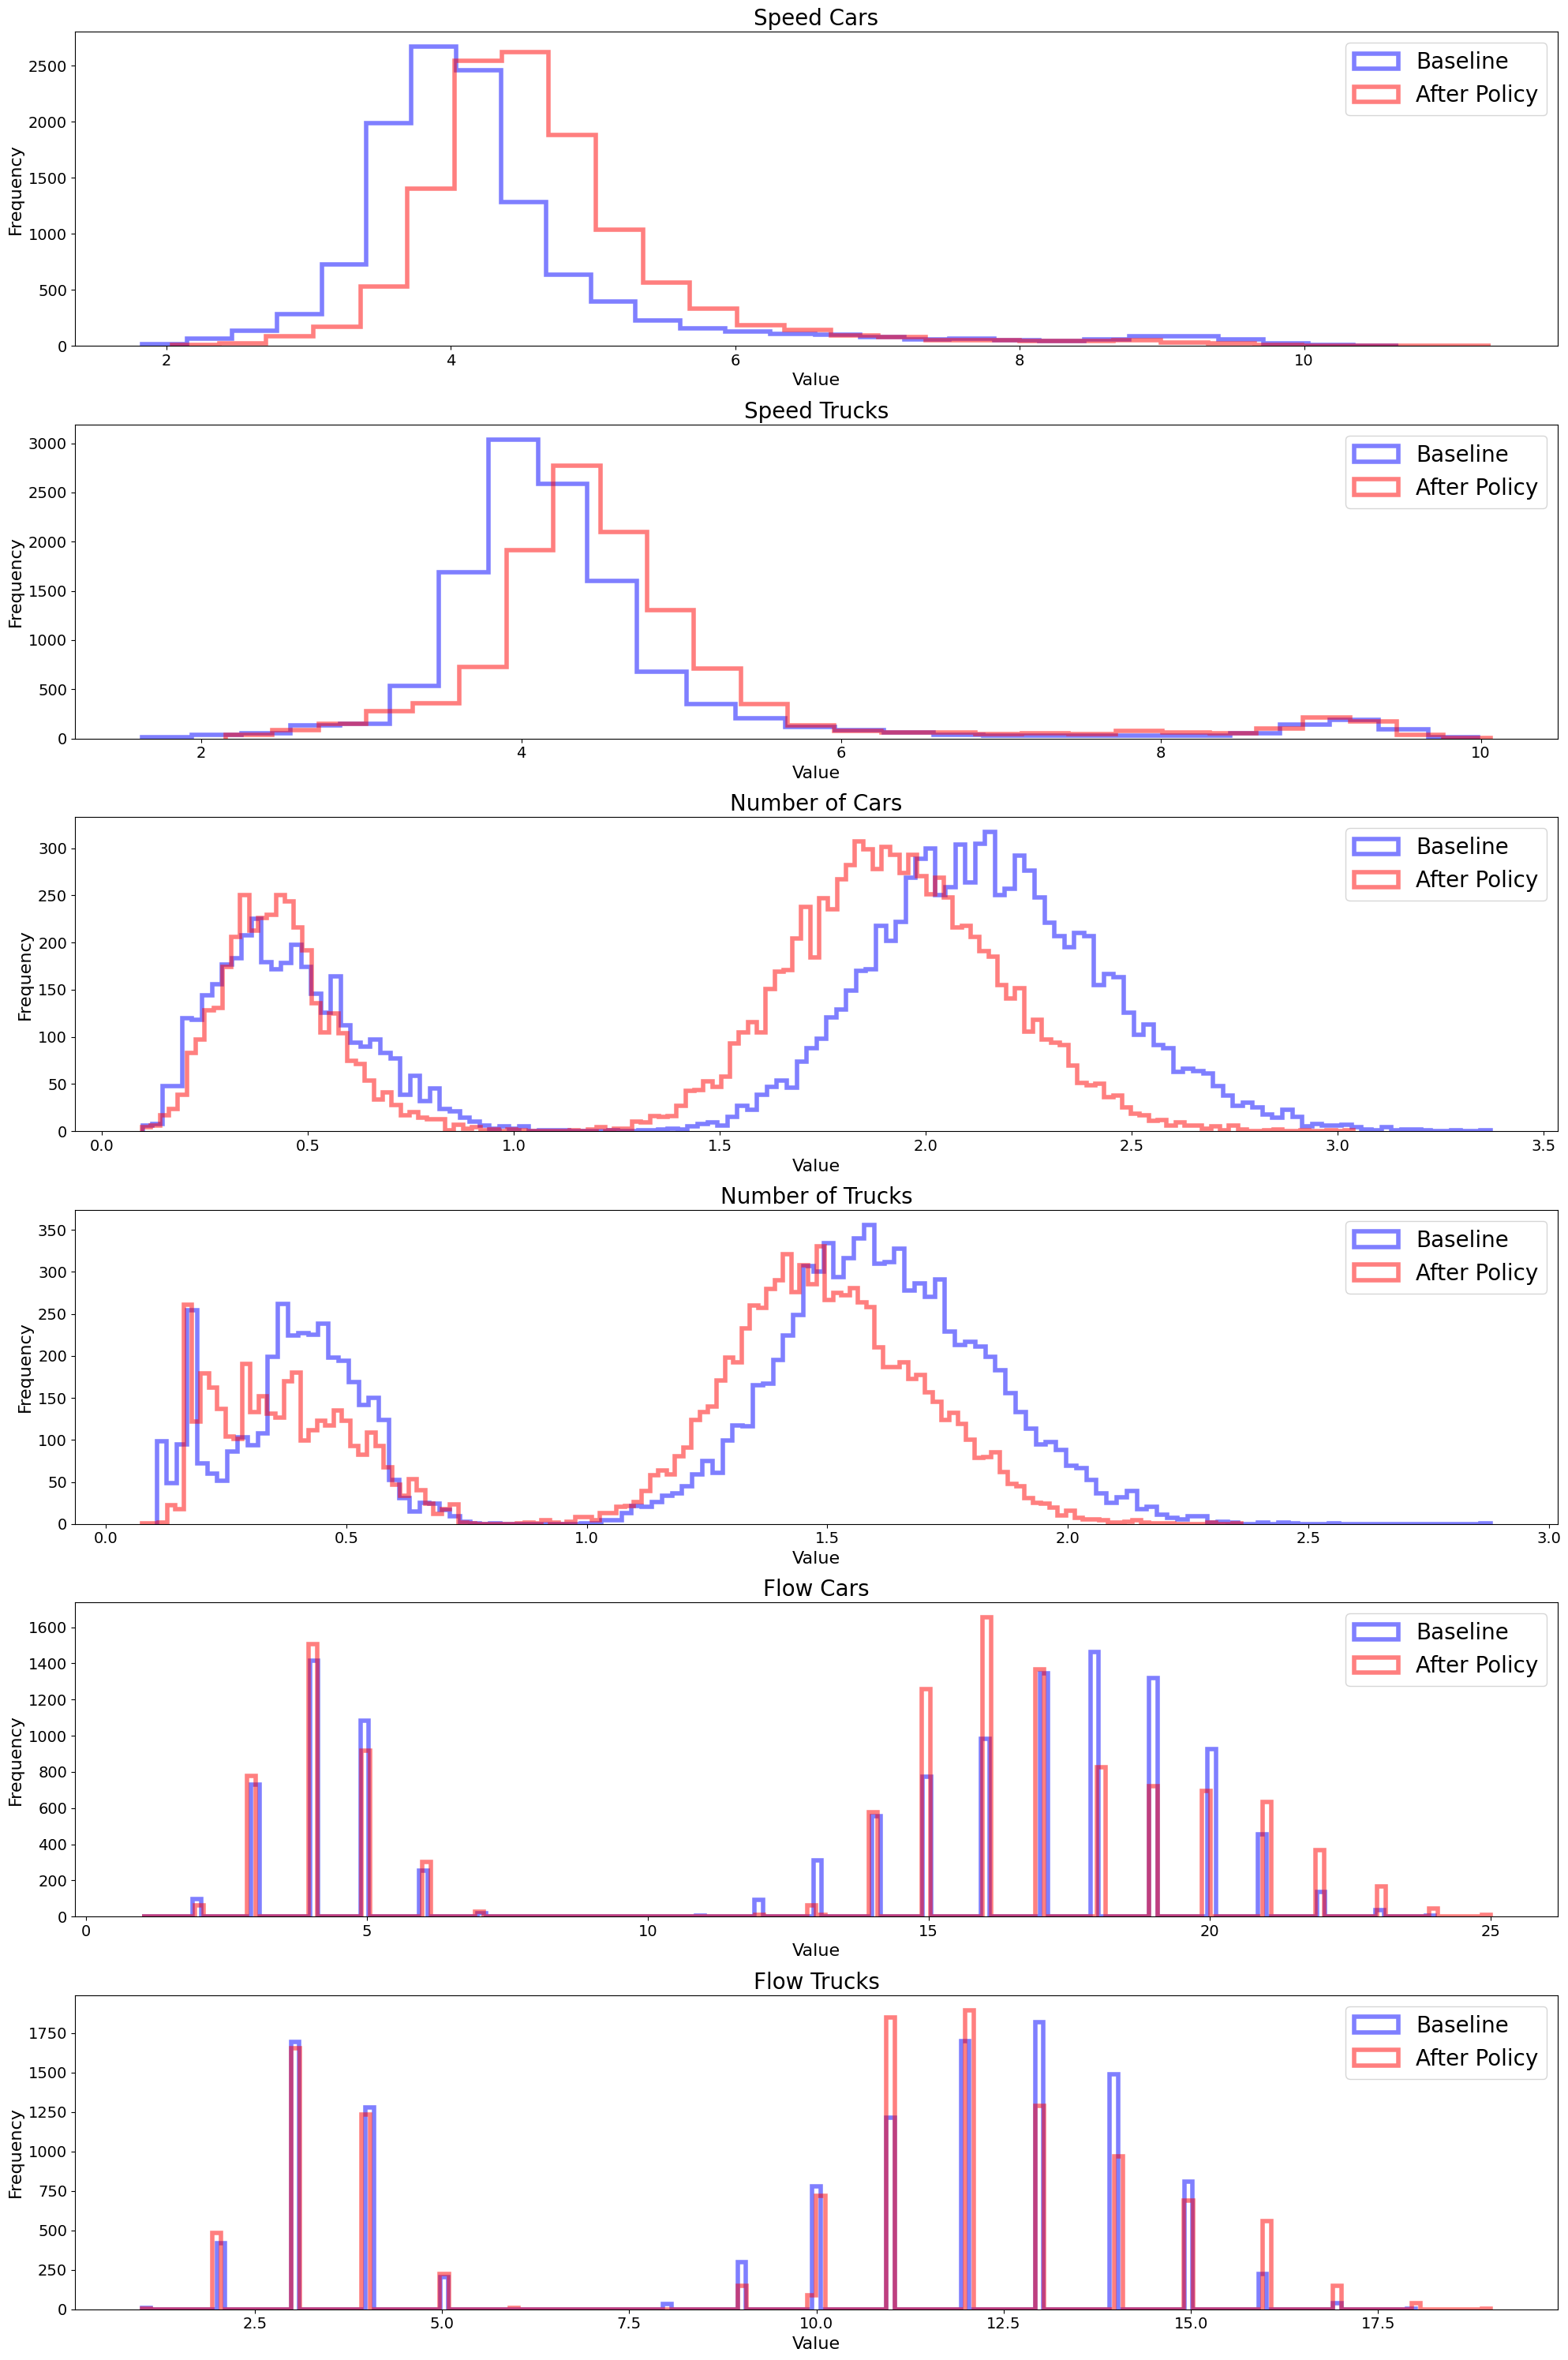

In [18]:
plot_histograms(scenario_0, scenario_1)

In [19]:
up_s0 = febagni_scripts.get_segment_data(scenario_0, "Elicoidale Upstream")
up_s1 = febagni_scripts.get_segment_data(scenario_1, "Elicoidale Upstream")

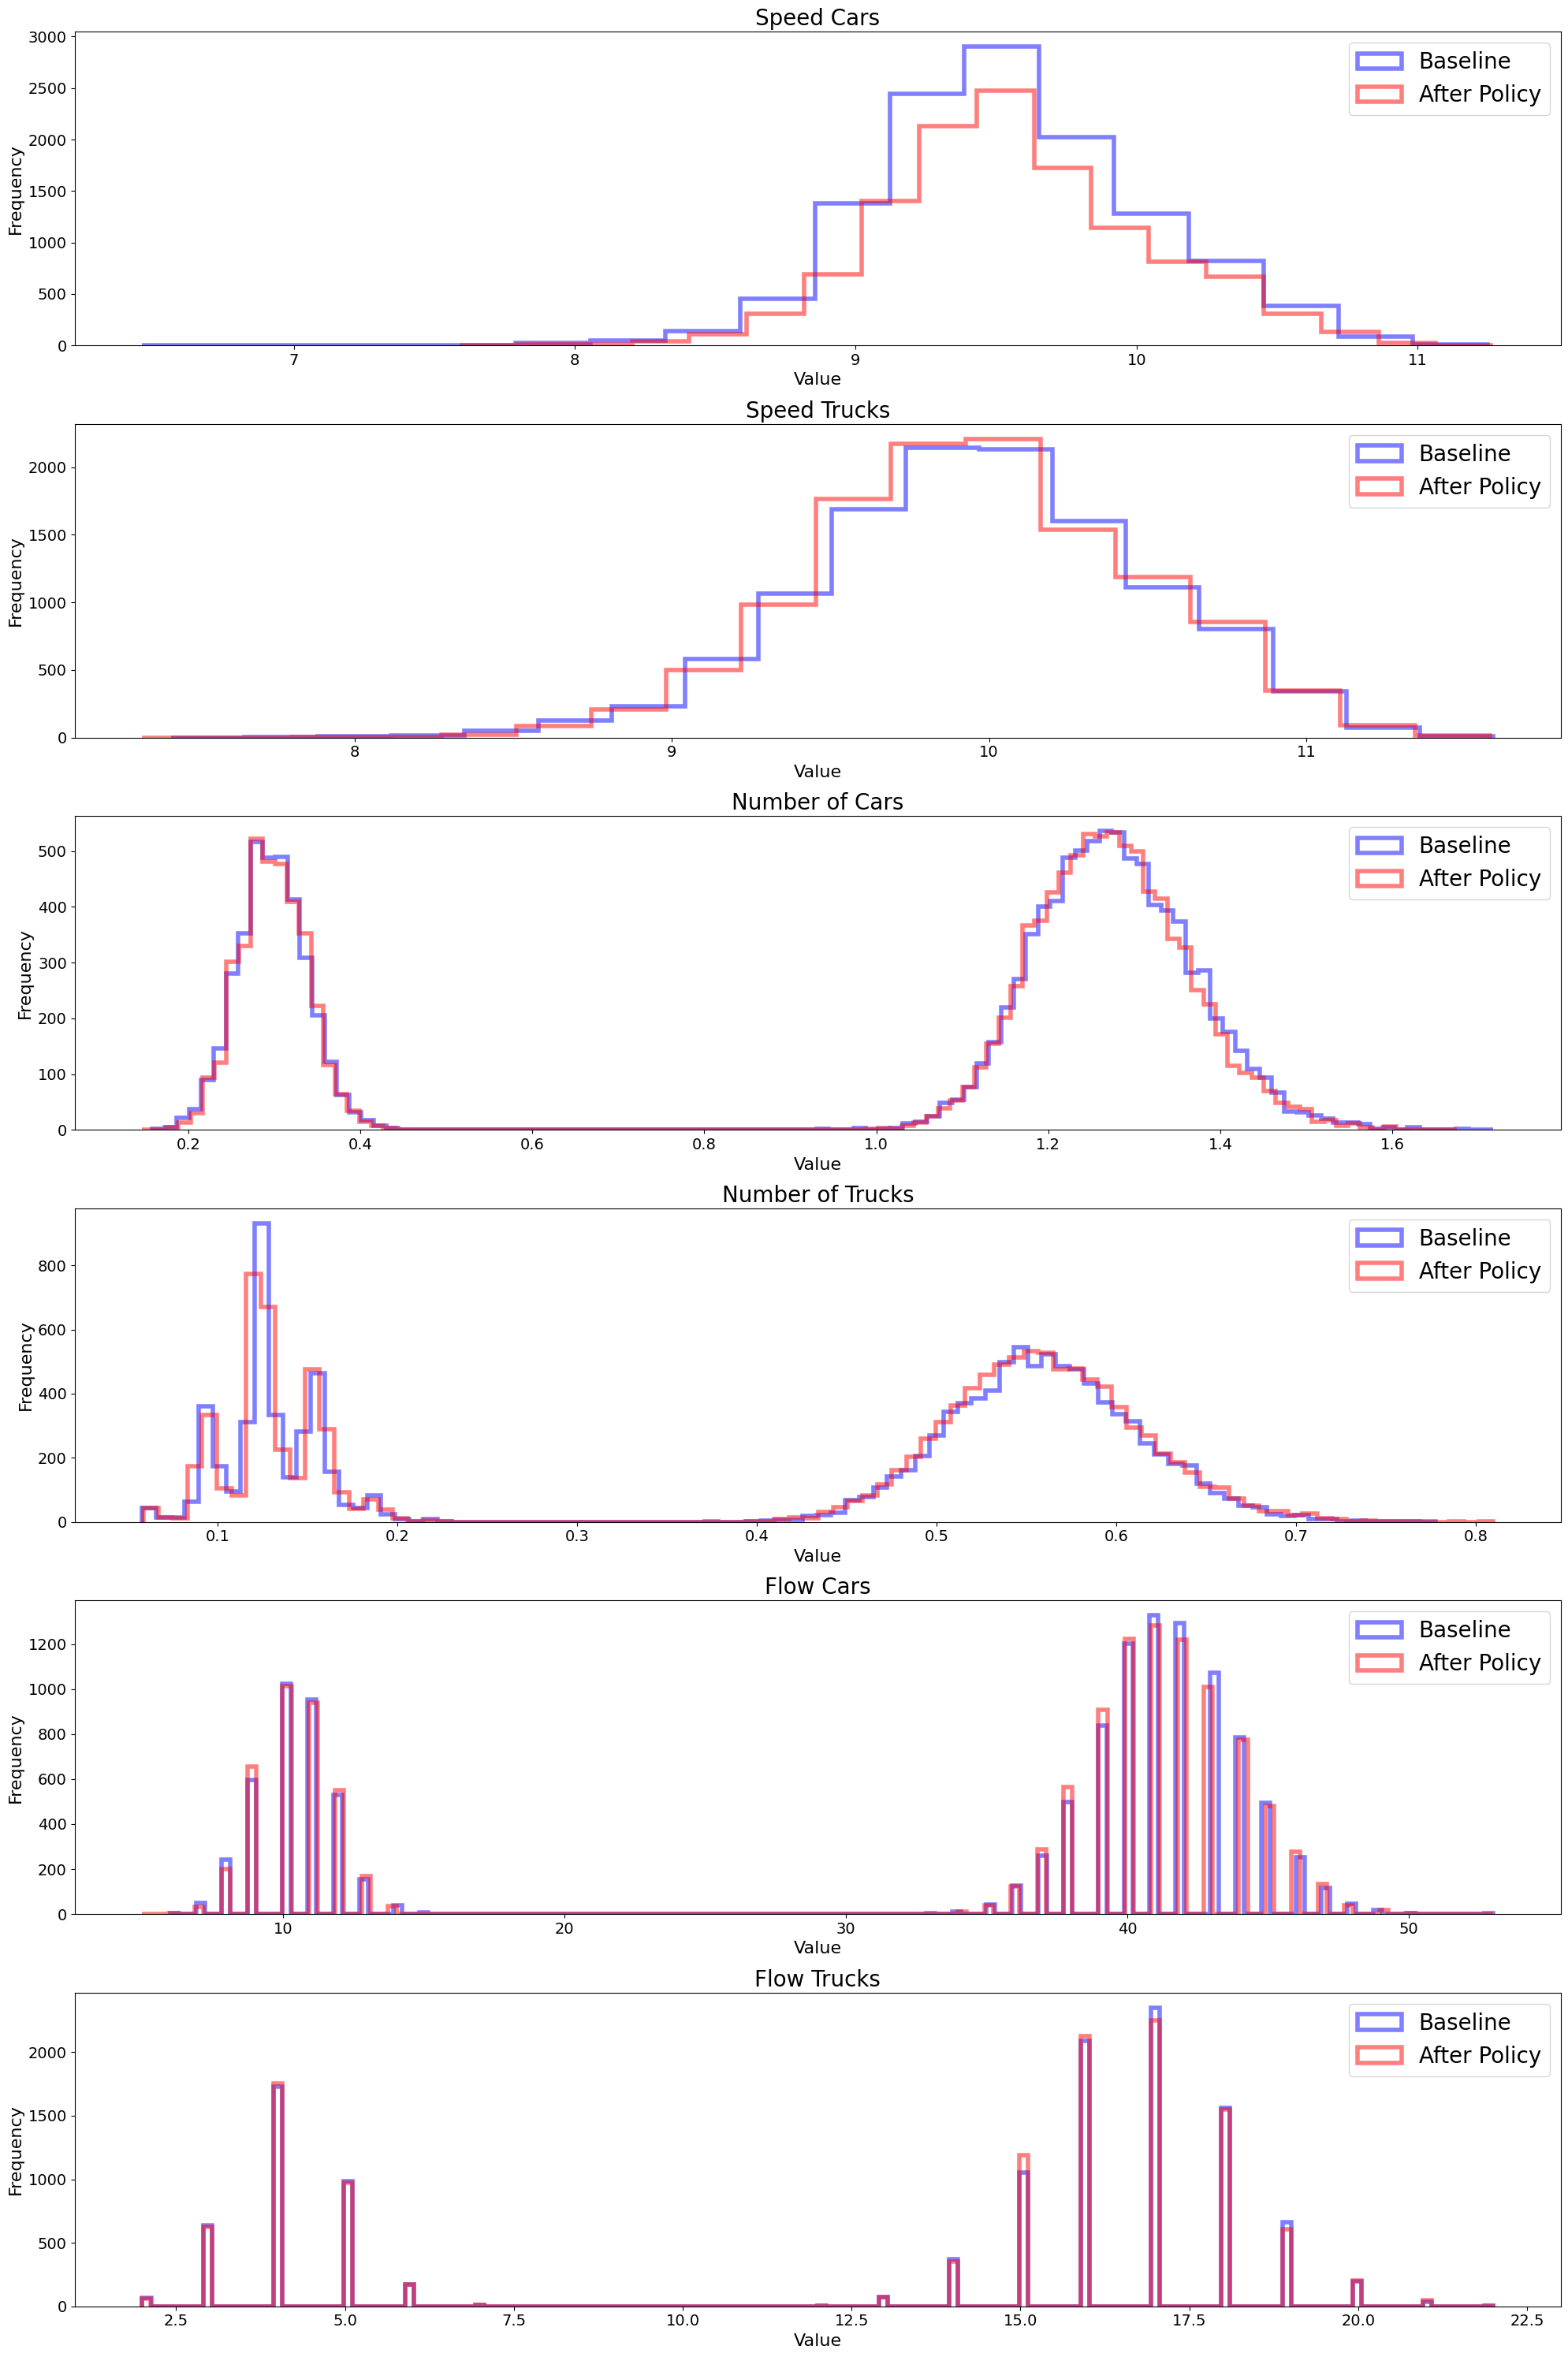

In [20]:
plot_histograms(up_s0, up_s1)

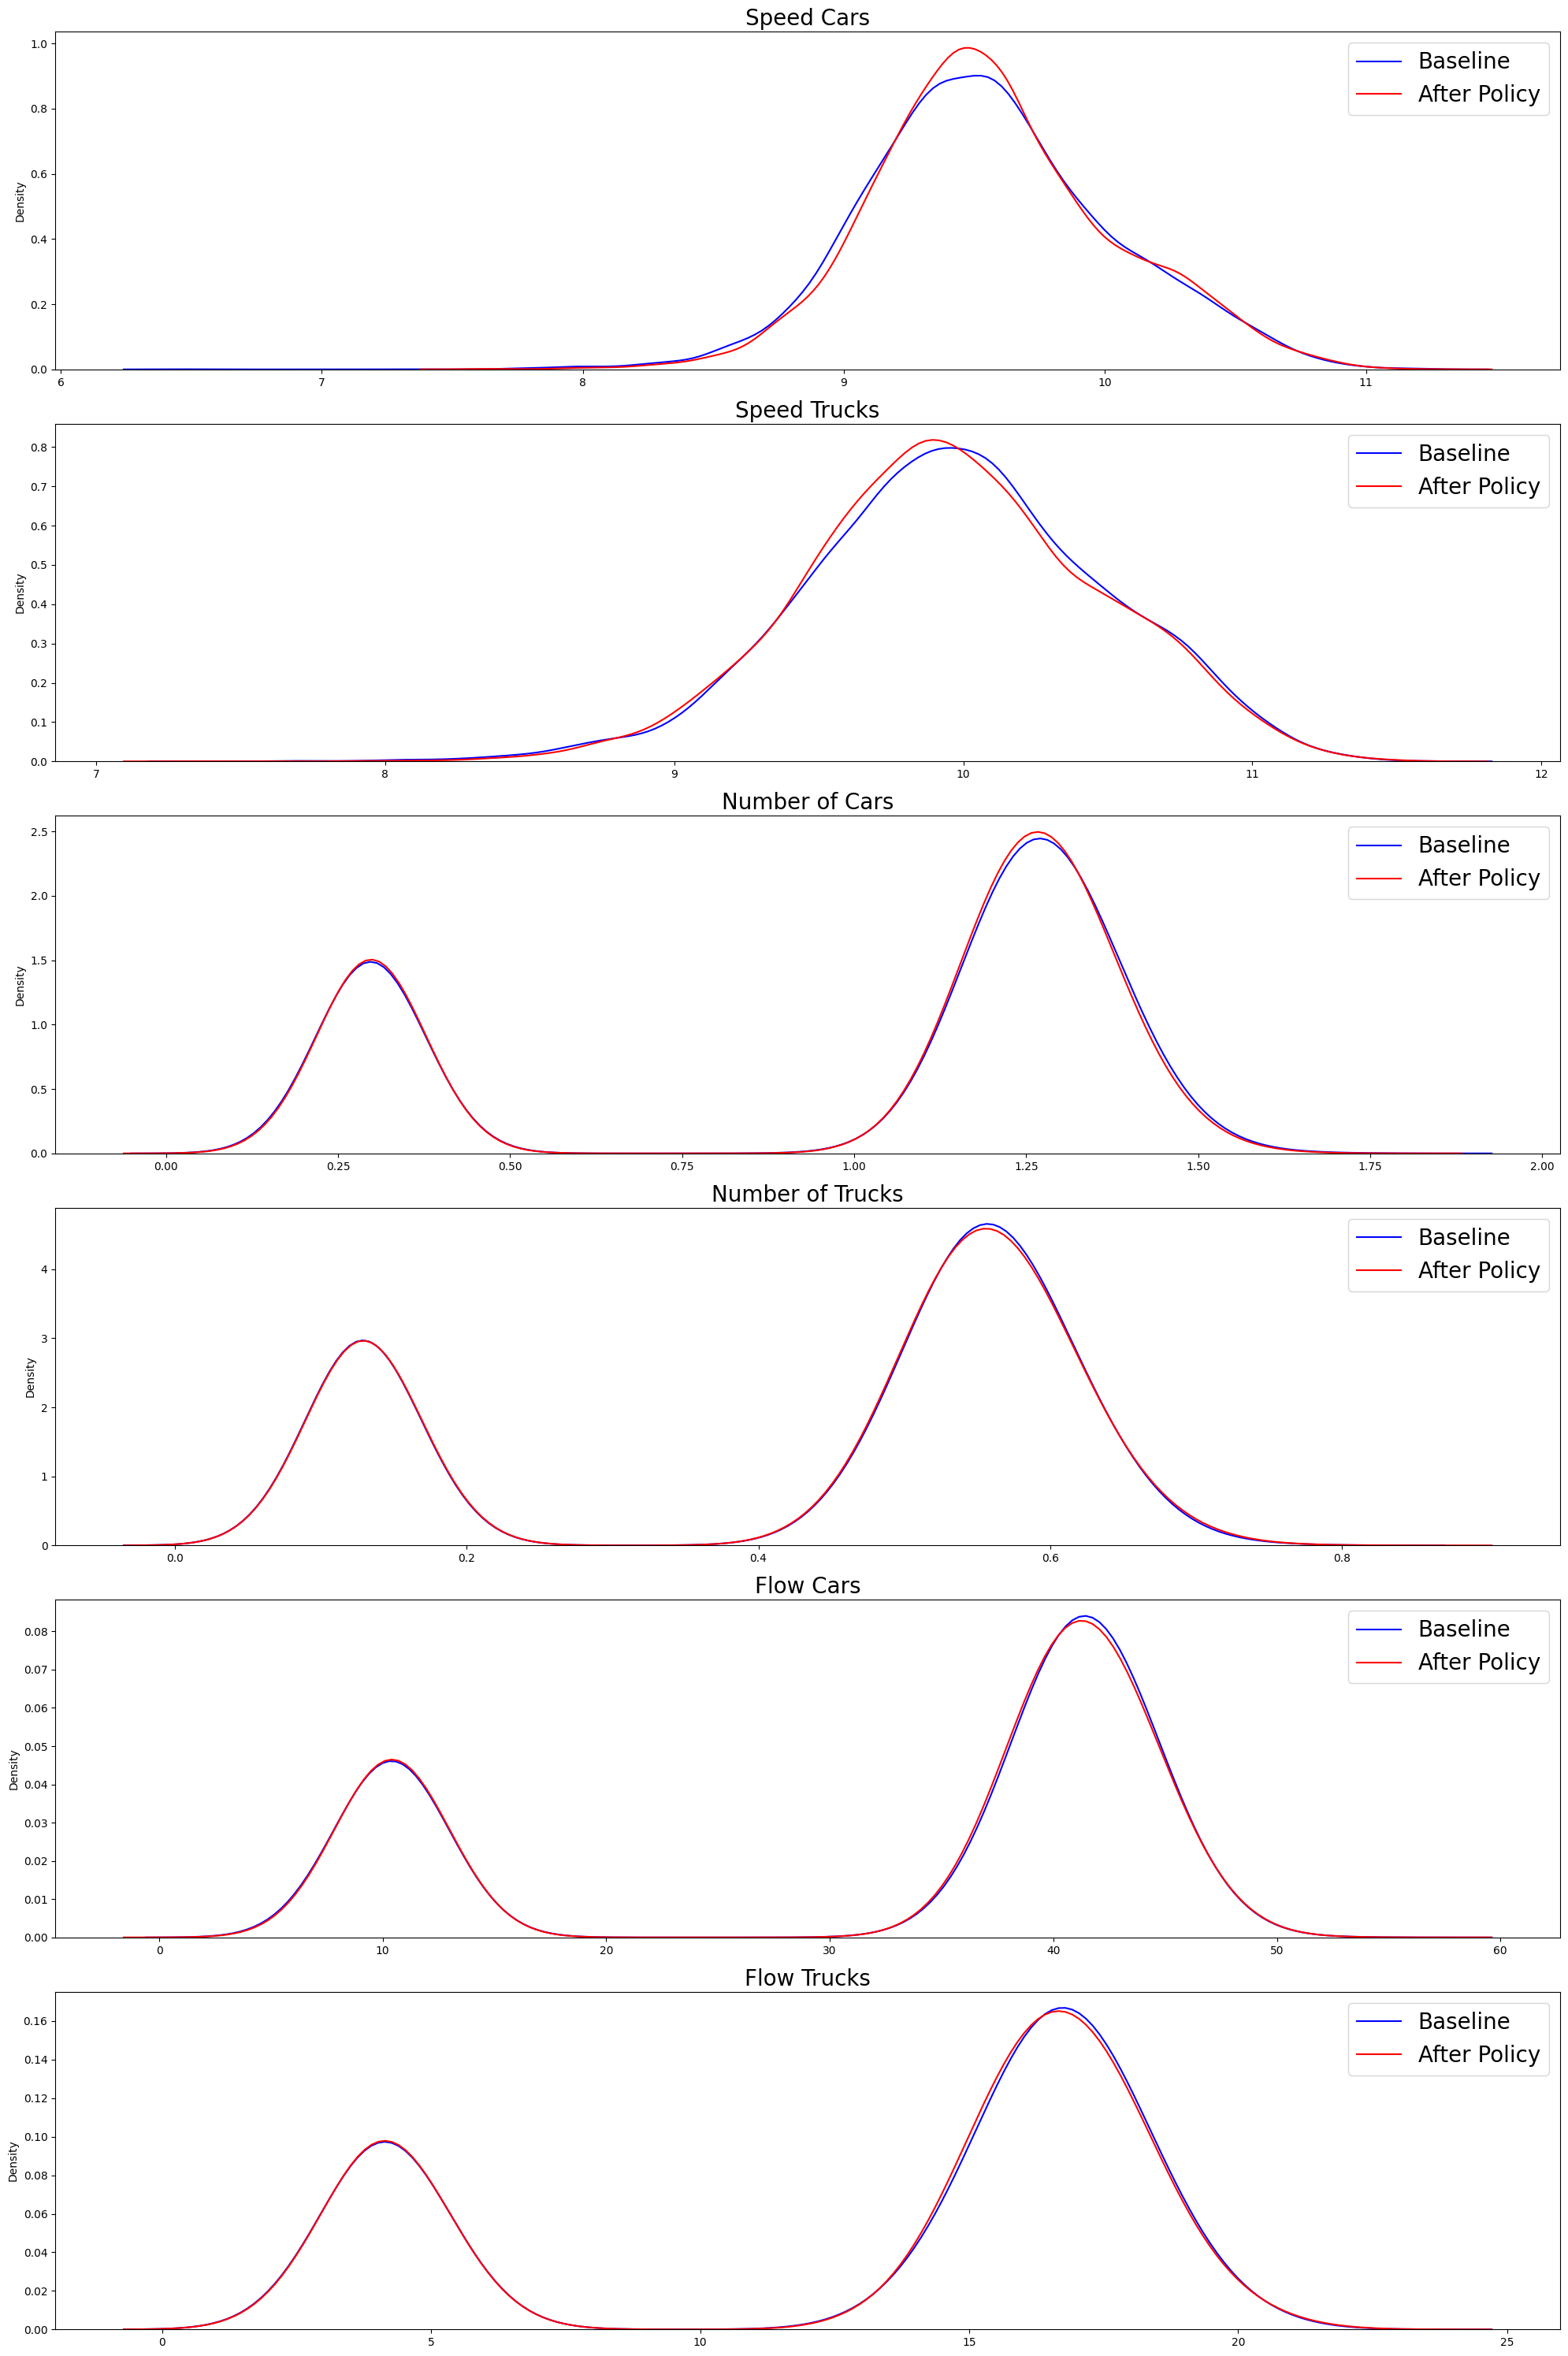

In [21]:
plot_distribution(up_s0, up_s1)

In [22]:
down_s0 = febagni_scripts.get_segment_data(scenario_0, "Elicoidale Downstream")
down_s1 = febagni_scripts.get_segment_data(scenario_1, "Elicoidale Downstream")

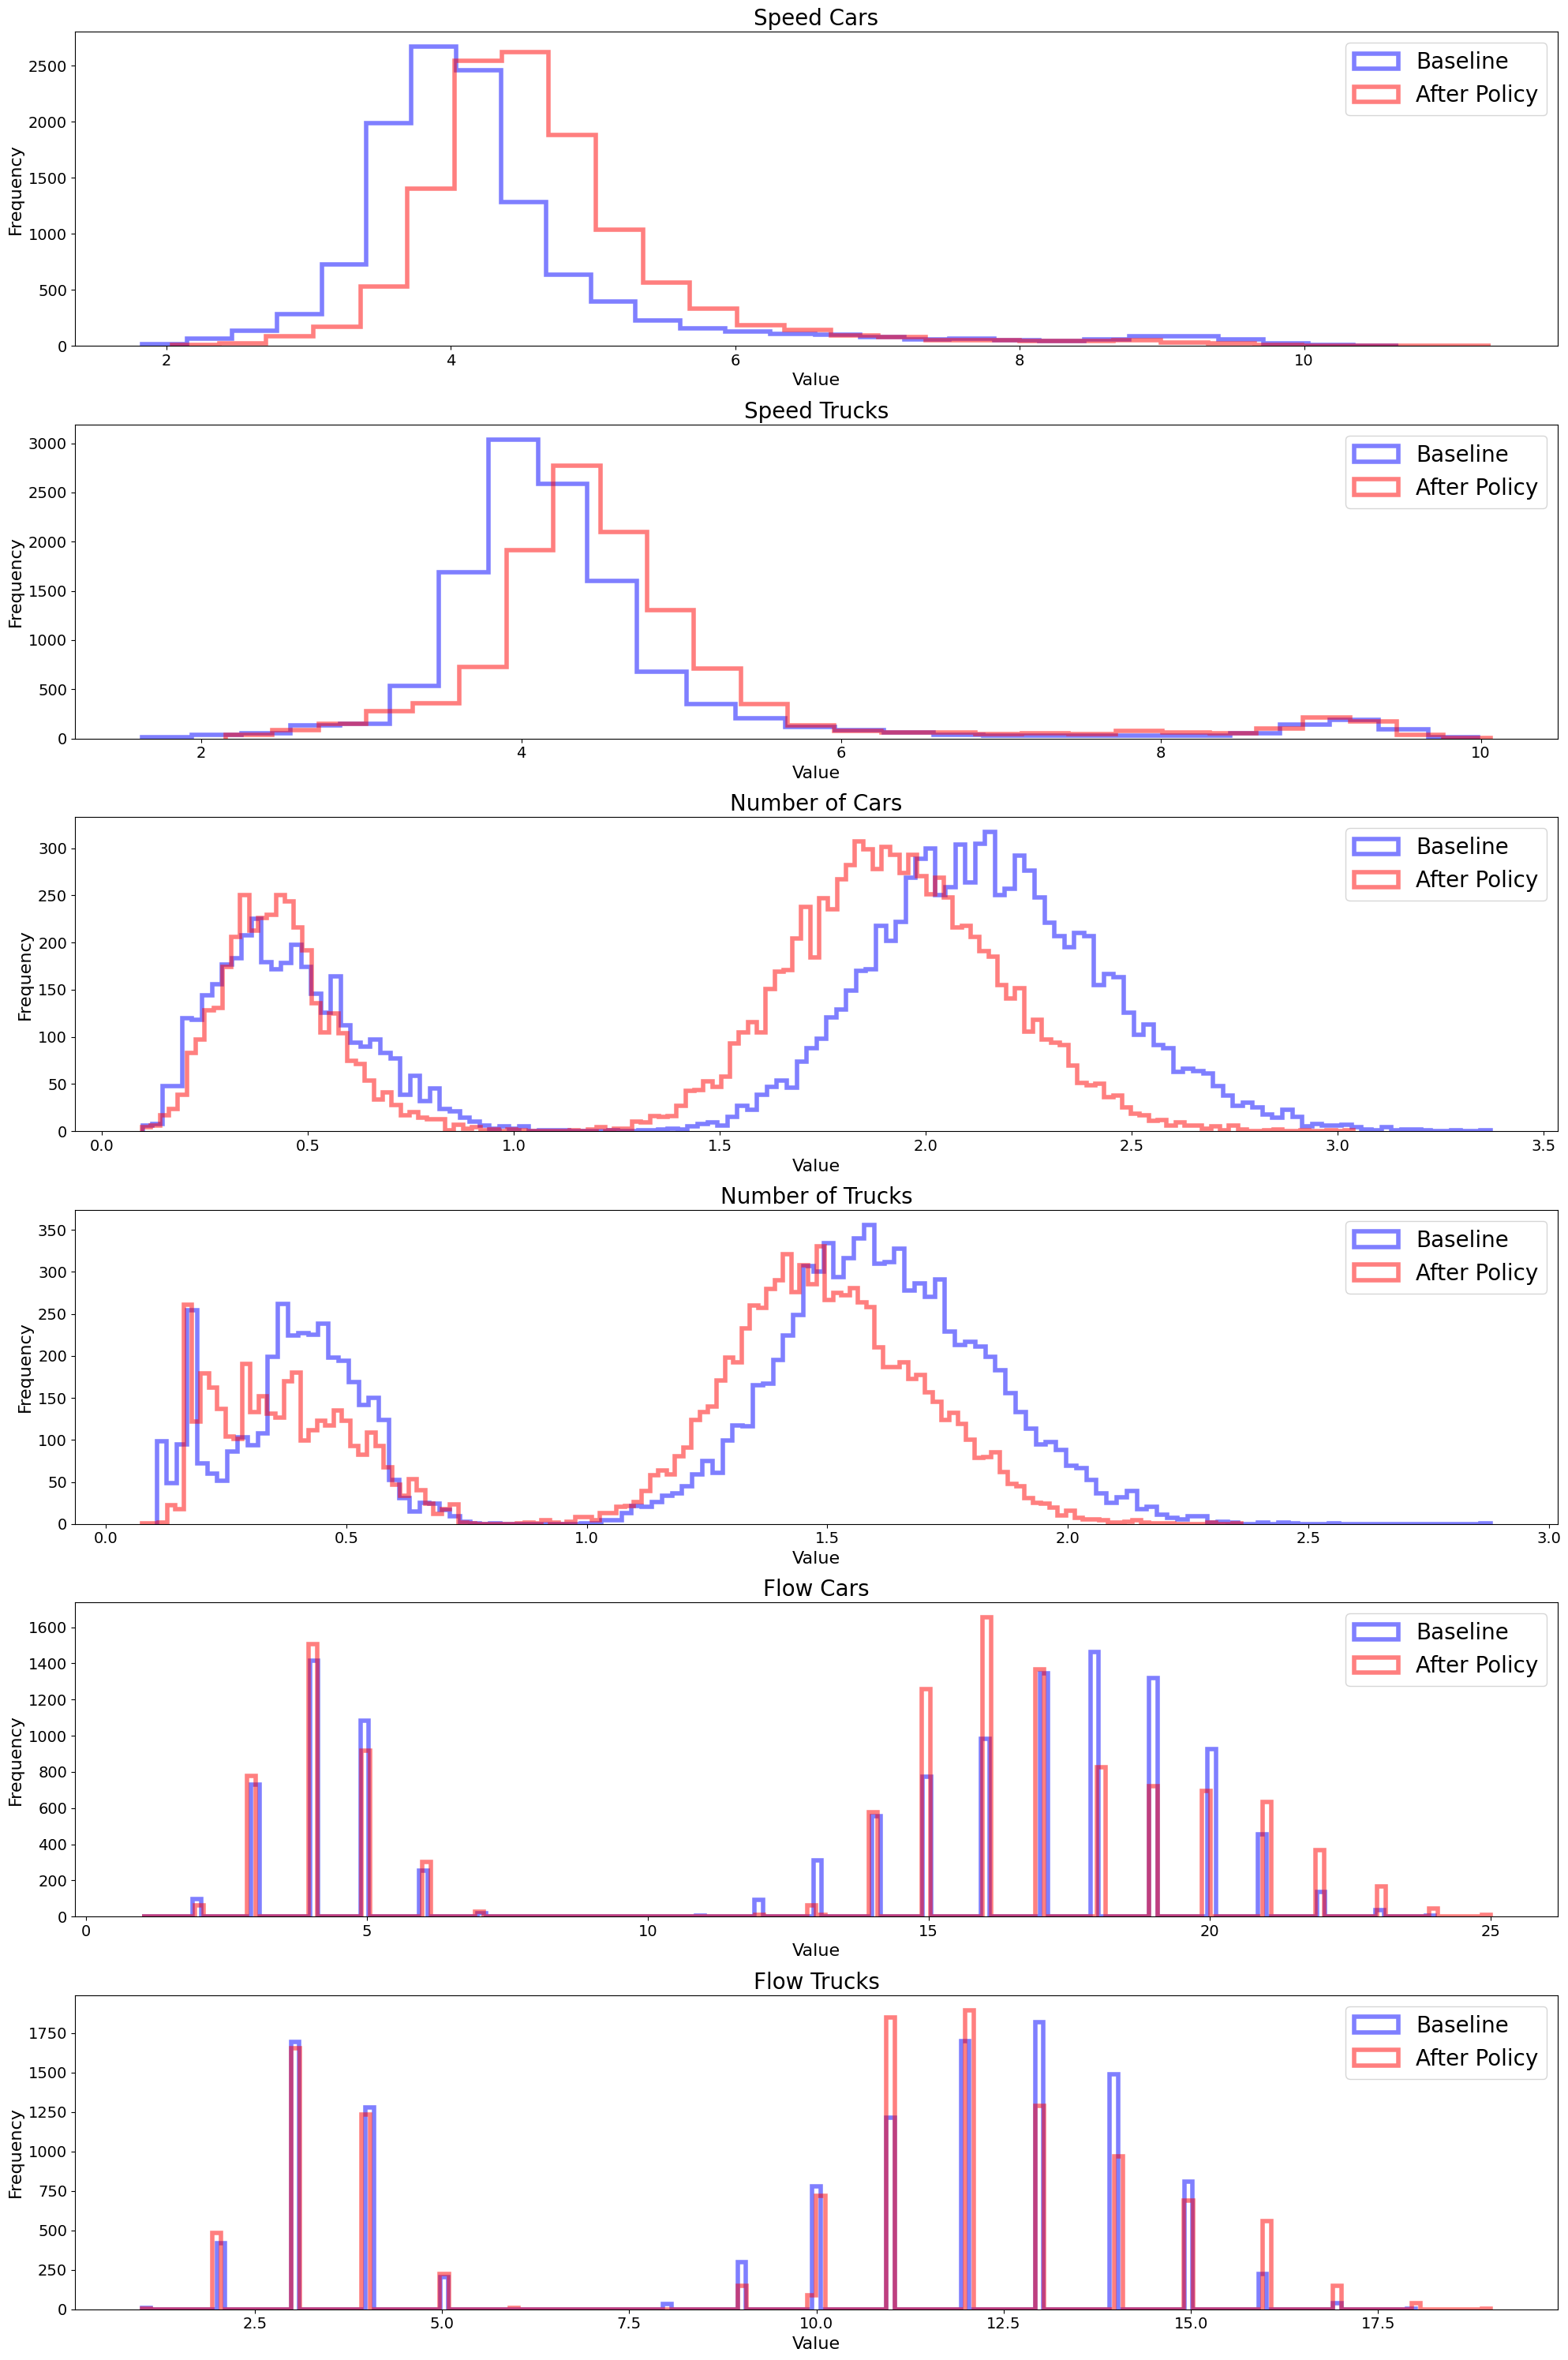

In [23]:
plot_histograms(down_s0, down_s1)

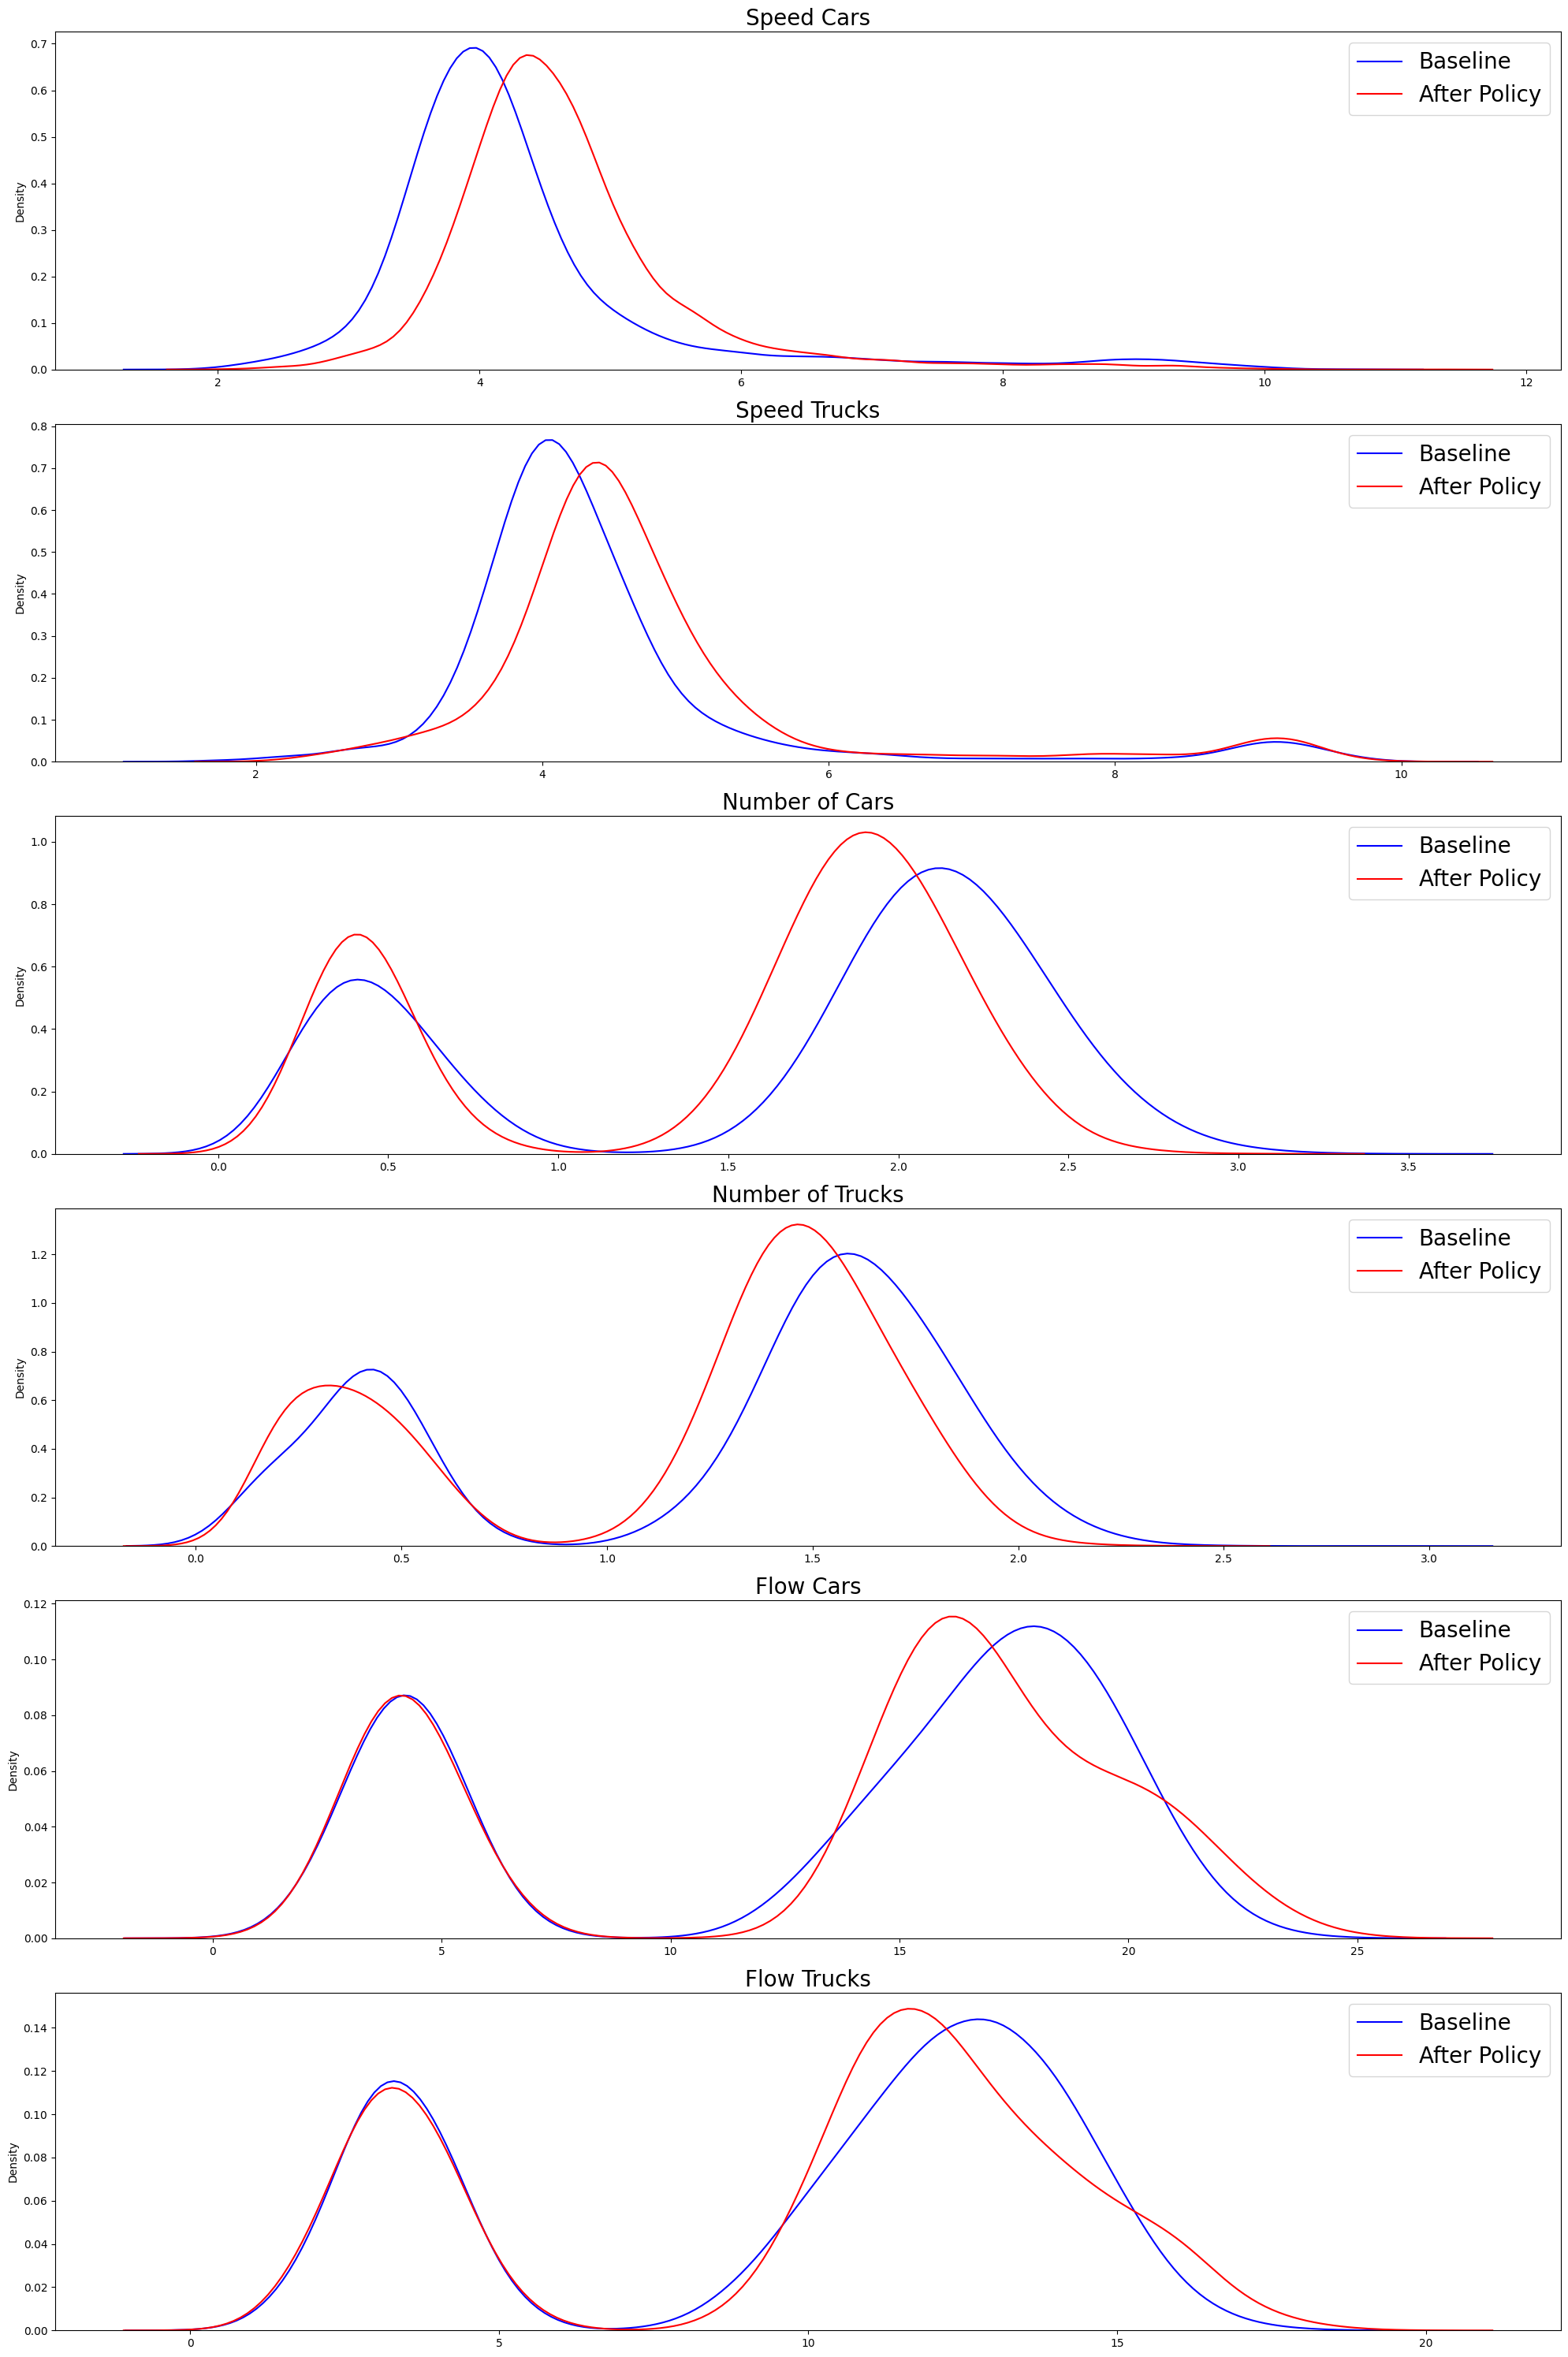

In [24]:
plot_distribution(down_s0, down_s1)

In [25]:
lungomare_s0 = febagni_scripts.get_segment_data(scenario_0, "Lungomare Canepa")
lungomare_s1 = febagni_scripts.get_segment_data(scenario_1, "Lungomare Canepa")

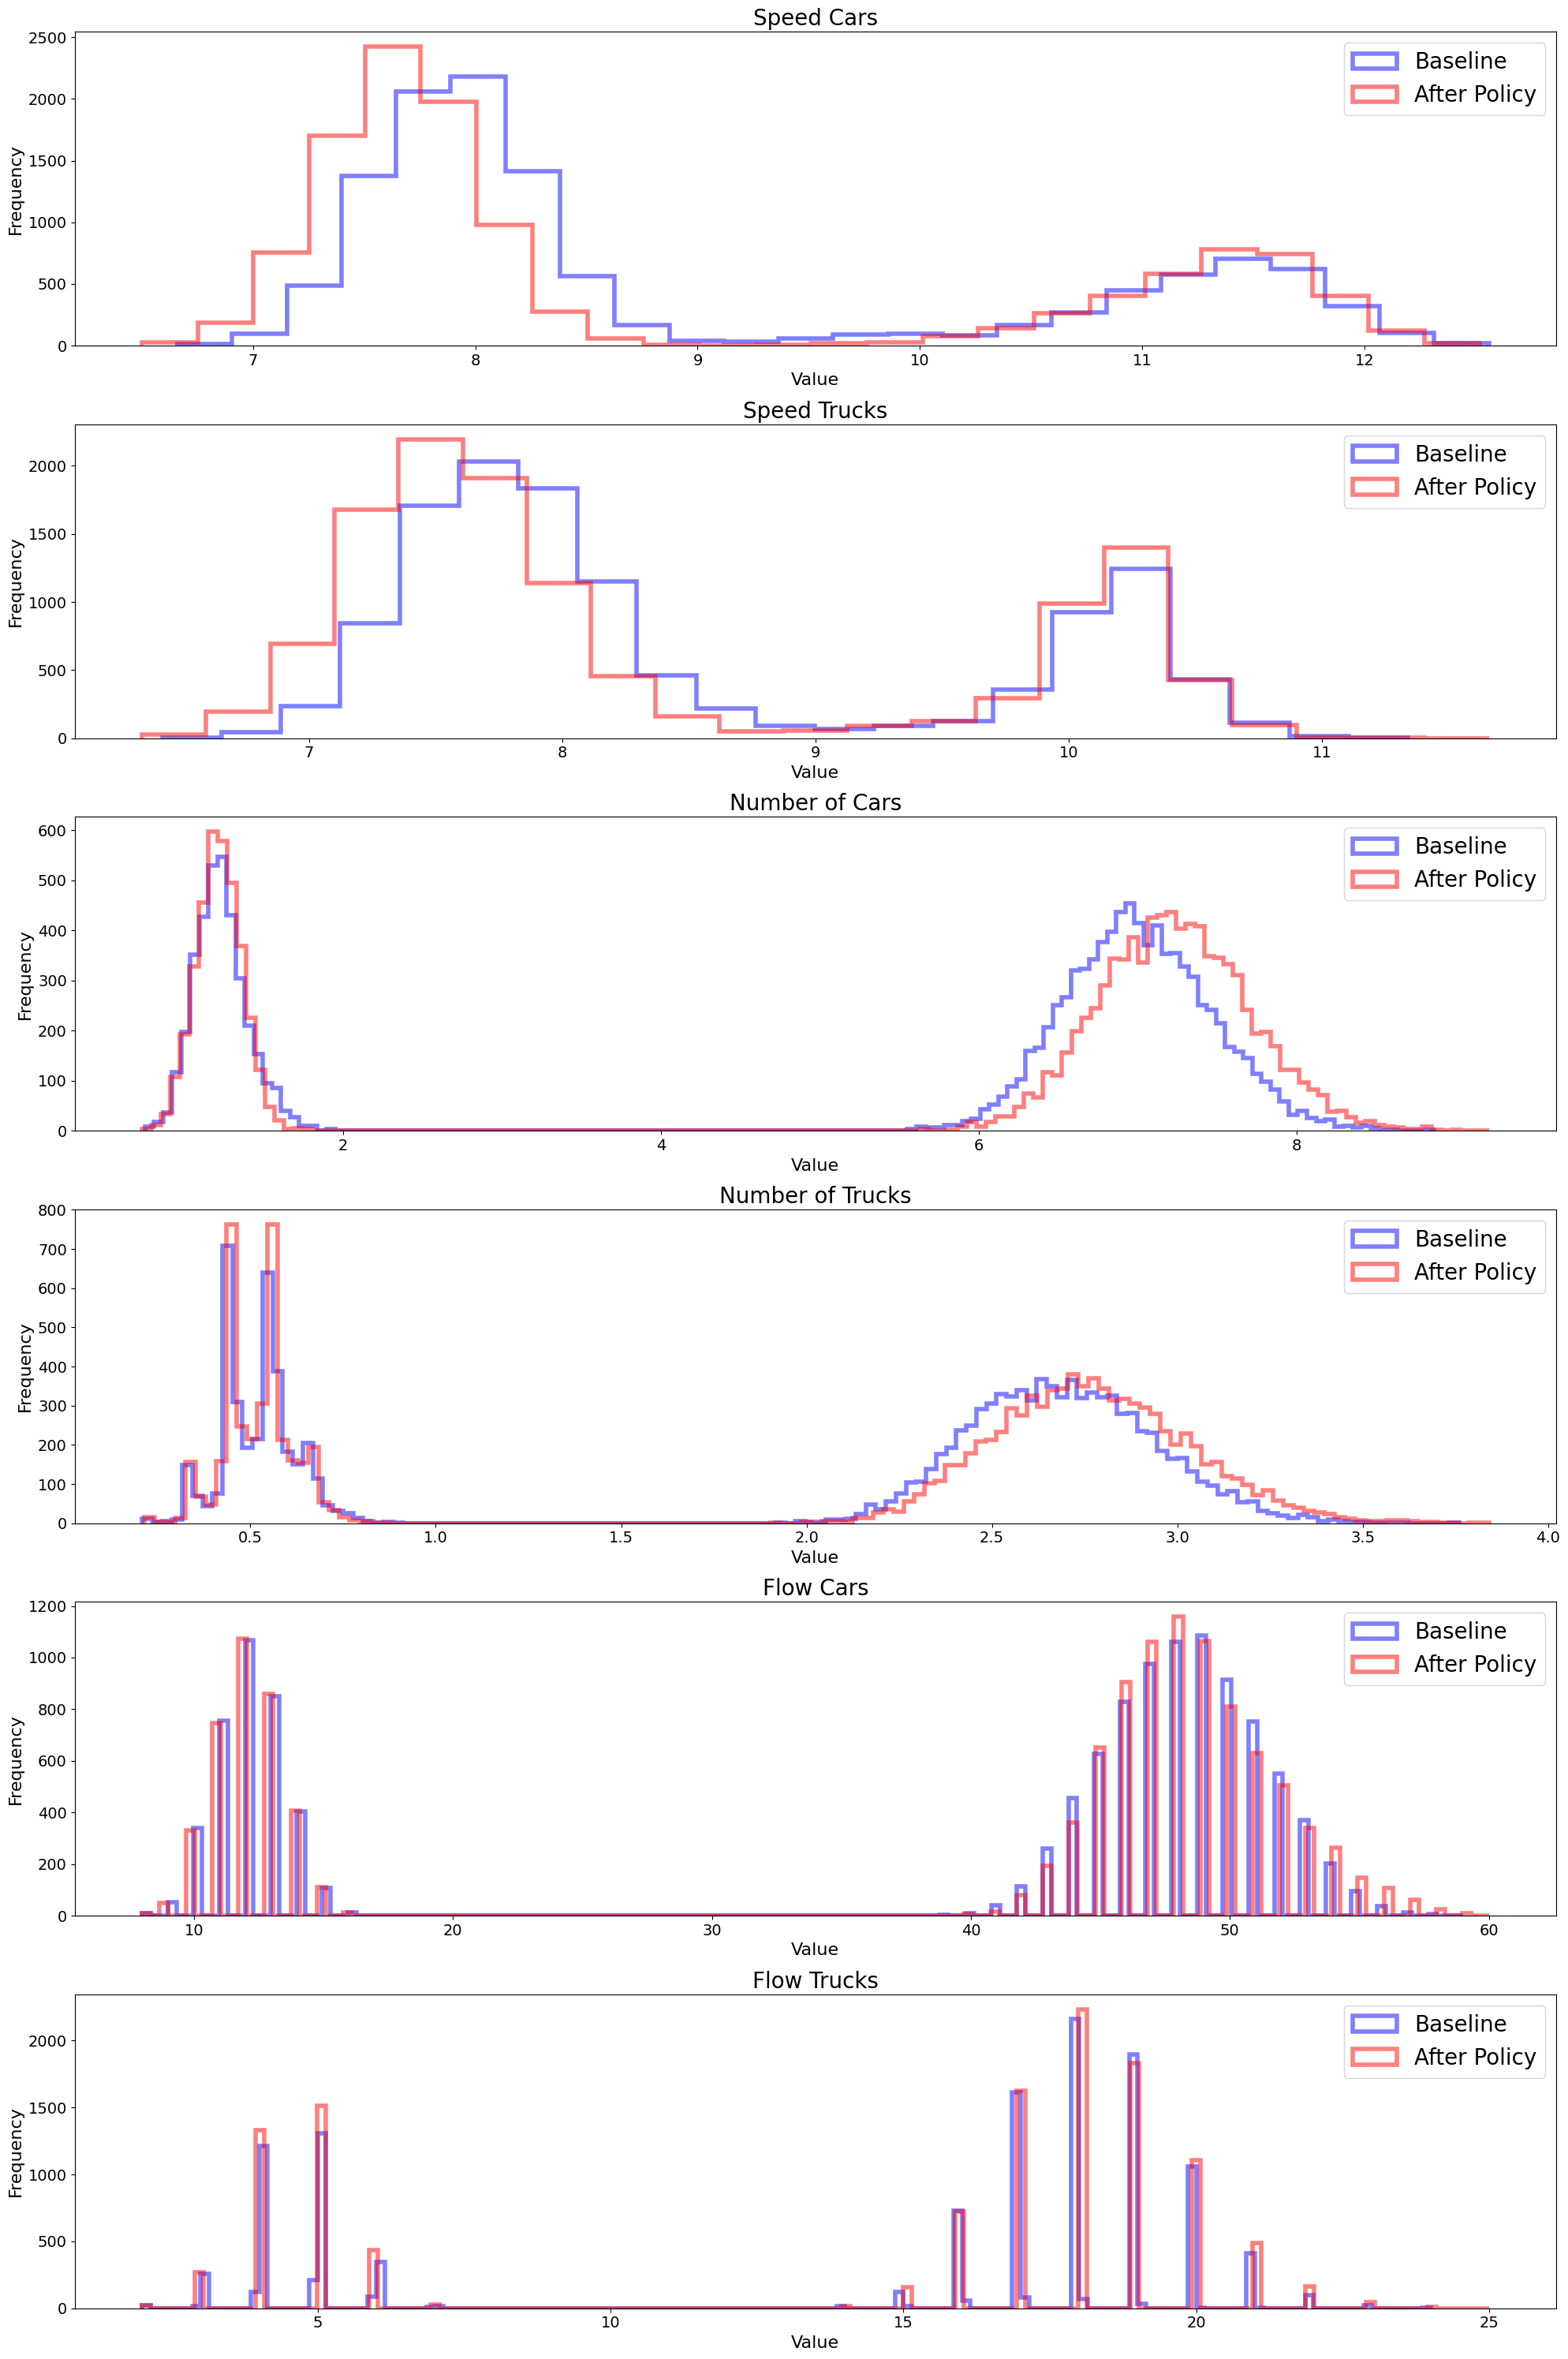

In [26]:
plot_histograms(lungomare_s0, lungomare_s1)

In [27]:
francia_s0 = febagni_scripts.get_segment_data(scenario_0, "Via di Francia")
francia_s1 = febagni_scripts.get_segment_data(scenario_1, "Via di Francia")

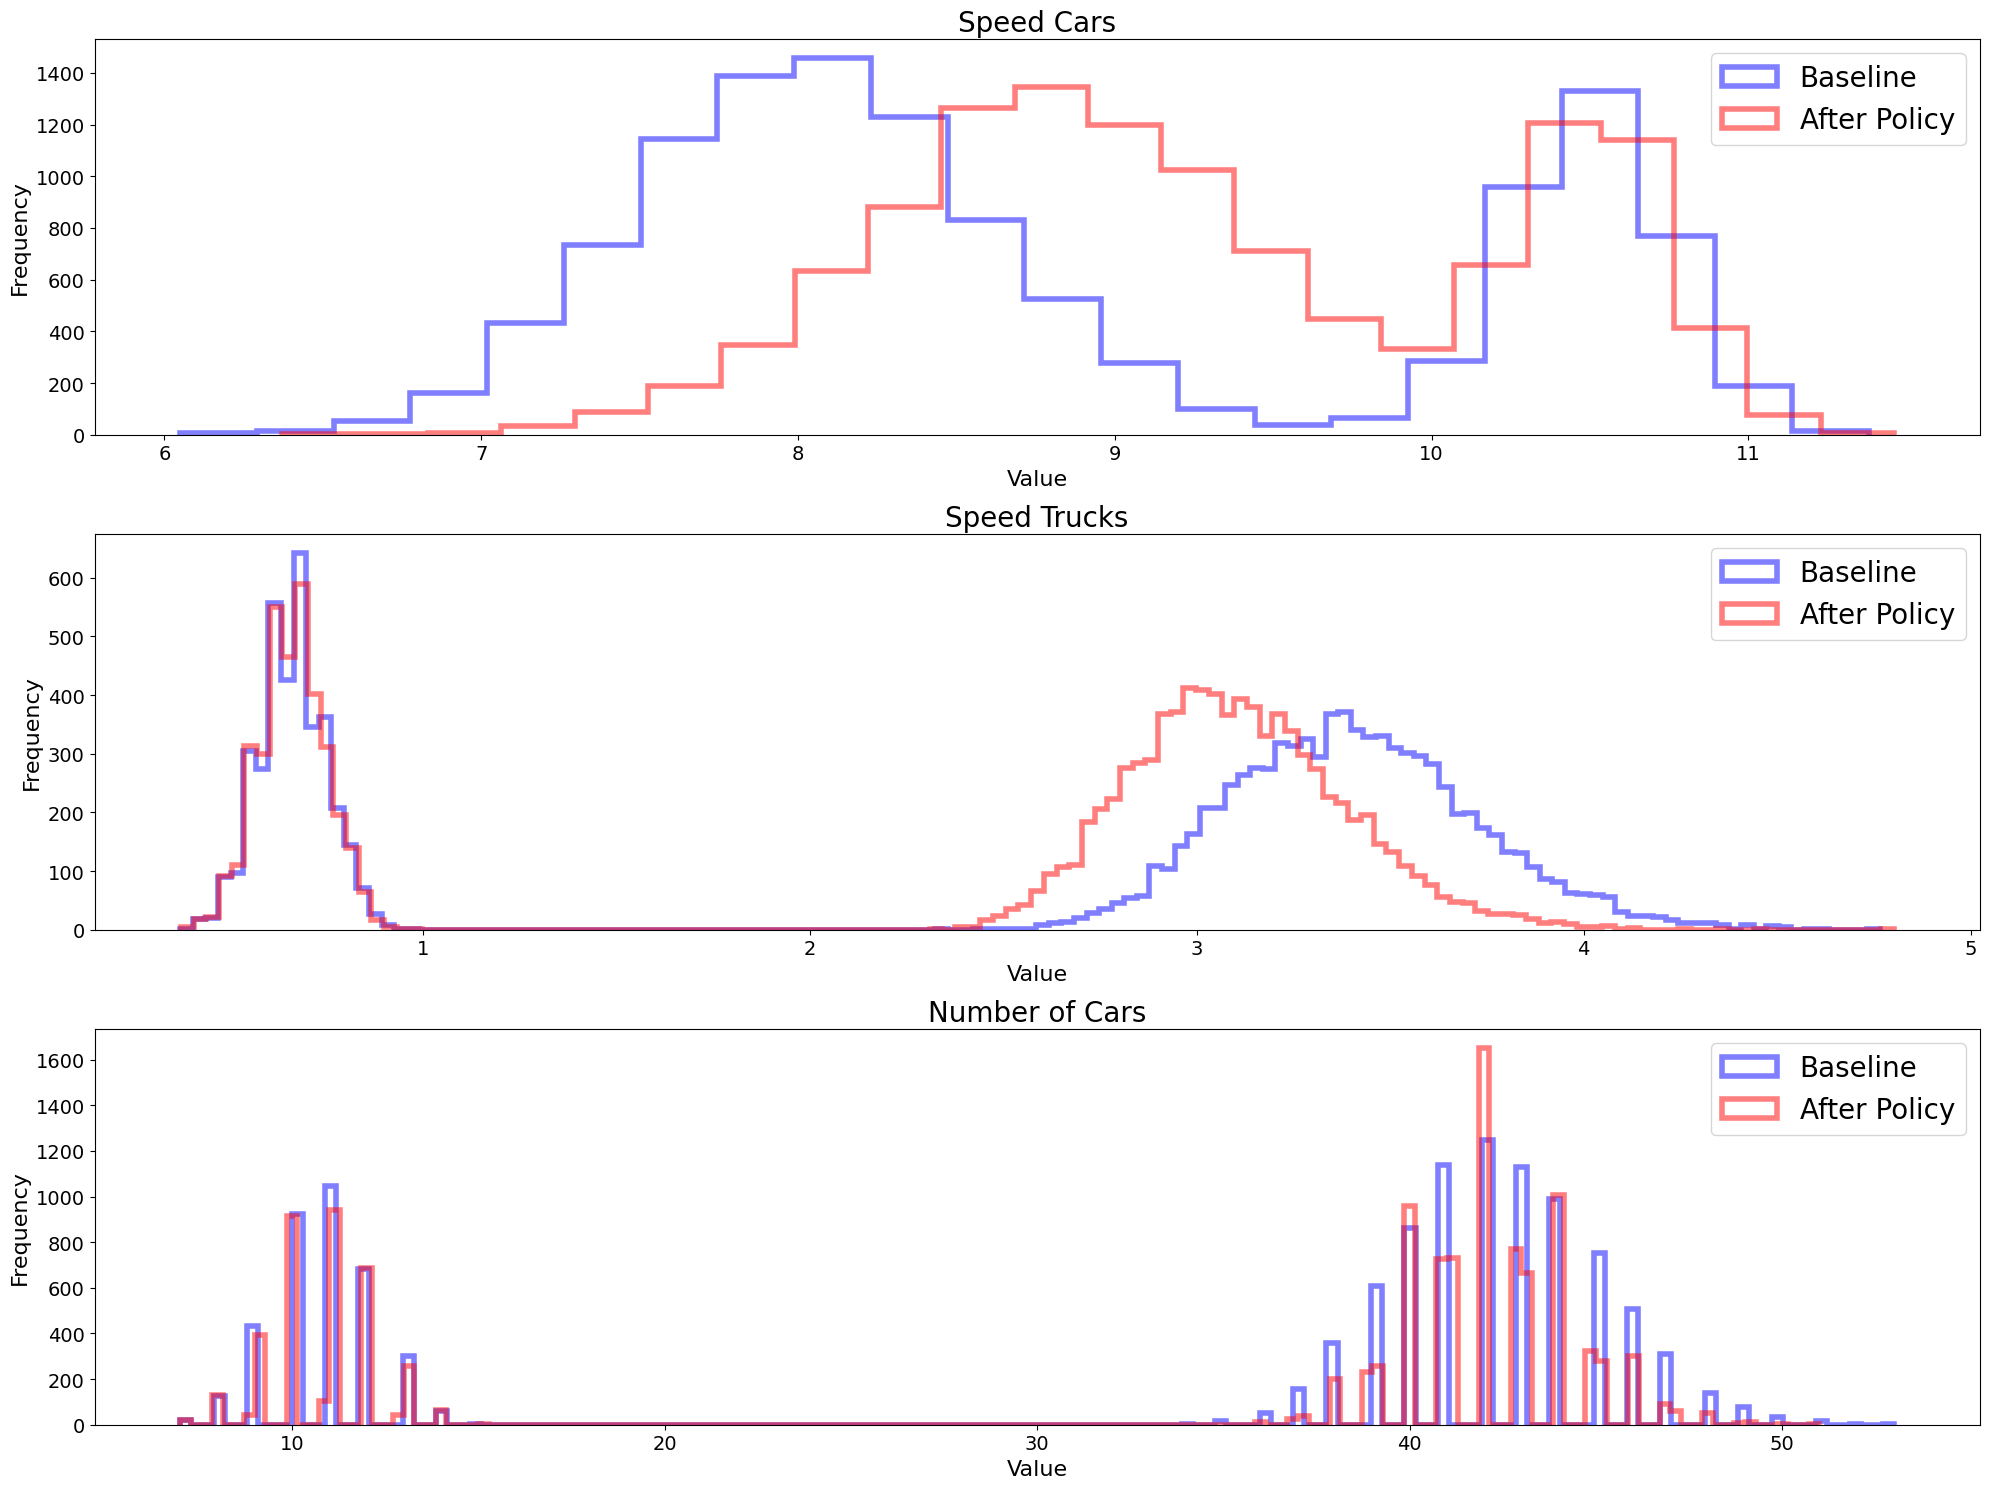

In [28]:
plot_histograms_francia(francia_s0, francia_s1)

In [29]:
def produce_sequences(s0, s1, T):
    """
    Shuffles the samples (columns) of s0 and s1, then produces 3 outputs: tr_data, sequence0, and sequence1.

    Args:
        s0: The first input sequence (NumPy array) of shape (m, n).
        s1: The second input sequence (NumPy array) of shape (m, n).
        T: The number of samples to include in tr_data.

    Returns:
        A tuple containing:
        - tr_data: The first T shuffled samples from s0 (shape (T, m)).
        - sequence0: The remaining samples from s0 (shape (n-T, m)).
        - sequence1: The fully shuffled s1 (shape (n, m)).
    """

    # Shuffle samples (columns) within s0 and s1
    shuffled_indices = np.random.permutation(s0.shape[1])  # Generate shuffled indices
    s0 = s0[:, shuffled_indices]  # Shuffle columns (samples) in s0
    s1 = s1[:, shuffled_indices]  # Shuffle columns (samples) in s1

    # Ensure T does not exceed available samples
    T = min(T, s0.shape[1])

    # Split s0 into tr_data (first T samples) and sequence0 (remaining samples)
    tr_data = s0[:, :T].T  # Shape (T, m)
    sequence0 = s0[:, T:].T  # Shape (n-T, m)

    # sequence1 is just the shuffled s1, transposed to (n, m)
    sequence1 = s1.T  # Shape (n, m)

    return tr_data, sequence0, sequence1


In [30]:
def run_experiments_qtewma(scenario_0, scenario_1, N, ARL_0):
  methods = ["QT-EWMA"]
  # --- Parameters
  n_exp = 1000                    # number of iterations of the detection experiment
  # QT-EWMA params
  K = 32                          # number of bins of the QuantTree histogram
  lam = 0.03                      # lambda parameter of QT-EWMA
  # regarding our data
  cp = 0                          # change point

  detection_times = {method: np.zeros(n_exp) for method in methods}  # to compute the ARL_0
  stopping_times = {method: np.zeros(n_exp) for method in methods}  # to compute the detection delay

  for j in range(n_exp):
    tr_data, sequence0, sequence1 = produce_sequences(scenario_0, scenario_1, N)

    # --- Training and monitoring
    # QT-EWMA
    qtewma = QT_EWMA(pi_values=K, transformation_type='none', ARL_0=ARL_0, lam=lam)
    # Training
    qtewma.train_model(tr_data)
    # Monitoring
    stopping_times['QT-EWMA'][j] = qtewma.monitor(sequence0)
    detection_times['QT-EWMA'][j] = qtewma.monitor(sequence1)

  for method in methods:
      tp = np.where(detection_times[method] >= cp)
      avg_detection_delay = np.mean(detection_times[method][tp] - cp)

      empirical_ARL = np.mean(stopping_times[method][stopping_times[method] != -1])

      data = [{'N': N, 'avg_detection_delay': avg_detection_delay, 'empirical_ARL': empirical_ARL, 'ARL_0': ARL_0}]
      return pd.DataFrame(data) # Pass the list of dictionaries to pd.DataFrame

In [31]:
N=[64,128,256]
ARL_0=[500, 1000]

In [32]:
results_df = pd.DataFrame(columns=['N', 'avg_detection_delay', 'empirical_ARL', 'ARL_0'])
for n in N:
  for arl in ARL_0:
    results = run_experiments_qtewma(scenario_0, scenario_1, n, arl)

    if results_df is None or results_df.empty:
        results_df = results.copy()
    else:
        results_df = pd.concat([results_df, results], ignore_index=True)
print("All 4 segments, d=21")
print()
results_df

All 4 segments, d=21



,N,avg_detection_delay,empirical_ARL,ARL_0
0,64,123.596,515.652,500
1,64,188.943,942.588,1000
2,128,87.517,500.914,500
3,128,127.764,984.019,1000
4,256,61.180,476.831,500
5,256,87.193,990.188,1000


In [33]:
results_df = pd.DataFrame(columns=['N', 'avg_detection_delay', 'empirical_ARL', 'ARL_0'])
for n in N:
  for arl in ARL_0:
    # Get the results from the function
    results = run_experiments_qtewma(up_s0, up_s1, n, arl)
    if results_df is None or results_df.empty:
        results_df = results.copy()  # Avoid unnecessary concat
    else:
        results_df = pd.concat([results_df, results], ignore_index=True)

print("Elicoidale Upstream, d=6")
print()
results_df

Elicoidale Upstream, d=6



,N,avg_detection_delay,empirical_ARL,ARL_0
0,64,527.302000,467.210,500
1,64,988.618619,1000.241,1000
2,128,531.334000,517.399,500
3,128,964.207000,1009.751,1000
4,256,571.654000,501.424,500
5,256,1036.561000,999.812,1000


In [34]:
results_df = pd.DataFrame(columns=['N', 'avg_detection_delay', 'empirical_ARL', 'ARL_0'])
for n in N:
  for arl in ARL_0:
    # Get the results from the function
    results = run_experiments_qtewma(down_s0, down_s1, n, arl)
    if results_df is None or results_df.empty:
        results_df = results.copy()  # Avoid unnecessary concat
    else:
        results_df = pd.concat([results_df, results], ignore_index=True)

print("Elicoidale Downstream, d=6")
print()
results_df

Elicoidale Downstream, d=6



,N,avg_detection_delay,empirical_ARL,ARL_0
0,64,79.587,456.817,500
1,64,120.036,965.828,1000
2,128,53.149,508.465,500
3,128,73.019,1012.464,1000
4,256,42.965,520.505,500
5,256,52.669,1014.502,1000


In [35]:
results_df = pd.DataFrame(columns=['N', 'avg_detection_delay', 'empirical_ARL', 'ARL_0'])
for n in N:
  for arl in ARL_0:
    results = run_experiments_qtewma(lungomare_s0, lungomare_s1, n, arl)
    # Create a temporary DataFrame for the result
    # Concatenate the temporary DataFrame with the main results DataFrame
    #print(results_df)
    if results_df is None or results_df.empty:
        results_df = results.copy()  # Avoid unnecessary concat
    else:
        results_df = pd.concat([results_df, results], ignore_index=True)

print("Lungomare Canepa, d=6")
print()
results_df

Lungomare Canepa, d=6



,N,avg_detection_delay,empirical_ARL,ARL_0
0,64,227.198,500.760,500
1,64,384.523,1000.800,1000
2,128,145.566,514.191,500
3,128,232.250,1009.800,1000
4,256,105.899,508.722,500
5,256,143.455,1016.334,1000


In [36]:
results_df = pd.DataFrame(columns=['N', 'avg_detection_delay', 'empirical_ARL', 'ARL_0'])
for n in N:
  for arl in ARL_0:
    # Get the results from the function
    results = run_experiments_qtewma(francia_s0, francia_s1, n, arl)
    # Create a temporary DataFrame for the result
    # Concatenate the temporary DataFrame with the main results DataFrame
    #print(results_df)
    if results_df is None or results_df.empty:
        results_df = results.copy()  # Avoid unnecessary concat
    else:
        results_df = pd.concat([results_df, results], ignore_index=True)

print("Via di Francia, d=3")
print()
results_df

Via di Francia, d=3



,N,avg_detection_delay,empirical_ARL,ARL_0
0,64,37.555,488.817,500
1,64,48.577,1002.611,1000
2,128,29.221,498.894,500
3,128,35.484,994.511,1000
4,256,24.279,496.126,500
5,256,28.623,1070.920,1000
